In [1]:
# i am gonna import the required modules

from matplotlib import scale
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as pp

df = pd.read_csv('C:\AllDesktop\Prog\python\MANAS\DataSheets\logistic_regression_weatherAUS.csv')

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0


In [2]:
# replacing the nan values

df.MinTemp.fillna(df.MinTemp.median(skipna=True), inplace = True)
df.MaxTemp.fillna(df.MaxTemp.median(skipna=True), inplace = True)

df.Rainfall.fillna(df.Rainfall.median(skipna=True), inplace = True)

df.Evaporation.fillna(df.Evaporation.median(skipna=True), inplace = True)

df.WindSpeed9am.fillna(df.WindSpeed9am.median(skipna=True), inplace = True)
df.WindSpeed3pm.fillna(df.WindSpeed3pm.median(skipna=True), inplace = True)

df.Humidity9am.fillna(df.Humidity9am.median(skipna=True), inplace = True)
df.Humidity3pm.fillna(df.Humidity3pm.median(skipna=True), inplace = True)

df.Pressure9am.fillna(df.Pressure9am.median(skipna=True), inplace = True)
df.Pressure3pm.fillna(df.Pressure3pm.median(skipna=True), inplace = True)

df.Cloud9am.fillna(df.Cloud9am.median(skipna=True), inplace = True)
df.Cloud3pm.fillna(df.Cloud3pm.median(skipna=True), inplace = True)

df.Temp9am.fillna(df.Temp9am.median(skipna=True), inplace = True)
df.Temp3pm.fillna(df.Temp3pm.median(skipna=True), inplace = True)

df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,4.8,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0
1,02-12-2008,Albury,7.4,25.1,0.0,4.8,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0
2,03-12-2008,Albury,12.9,25.7,0.0,4.8,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0
3,04-12-2008,Albury,9.2,28.0,0.0,4.8,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0
4,05-12-2008,Albury,17.5,32.3,1.0,4.8,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
5,06-12-2008,Albury,14.6,29.7,0.2,4.8,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0.0
6,07-12-2008,Albury,14.3,25.0,0.0,4.8,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,0.0
7,08-12-2008,Albury,7.7,26.7,0.0,4.8,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0.0
8,09-12-2008,Albury,9.7,31.9,0.0,4.8,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,1.0
9,10-12-2008,Albury,13.1,30.1,1.4,4.8,15.0,11.0,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,0.0


In [3]:
# scaling the columns

scaler = MinMaxScaler()

df.Pressure9am = scaler.fit_transform(df[['Pressure9am', 'Pressure3pm']])
df.Pressure3pm = scaler.fit_transform(df[['Pressure3pm', 'Pressure9am']])

df.Temp9am = scaler.fit_transform(df[['Temp9am', 'Temp3pm']])
df.Temp3pm = scaler.fit_transform(df[['Temp3pm', 'Temp9am']])

df.Humidity9am = scaler.fit_transform(df[['Humidity9am', 'Humidity3pm']])
df.Humidity3pm = scaler.fit_transform(df[['Humidity3pm', 'Humidity9am']])

df.WindSpeed9am = scaler.fit_transform(df[['WindSpeed9am', 'WindSpeed3pm']])
df.WindSpeed3pm = scaler.fit_transform(df[['WindSpeed3pm', 'WindSpeed9am']])

df.MaxTemp = scaler.fit_transform(df[['MaxTemp', 'MinTemp']])
df.MinTemp = scaler.fit_transform(df[['MinTemp', 'MaxTemp']])

df.Rainfall = scaler.fit_transform(df[['Rainfall', 'Evaporation']])
df.Evaporation = scaler.fit_transform(df[['Evaporation', 'Rainfall']])

df.Cloud9am = scaler.fit_transform(df[['Cloud9am', 'Cloud3pm']])
df.Cloud3pm = scaler.fit_transform(df[['Cloud3pm', 'Cloud9am']])

df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,01-12-2008,Albury,0.516509,0.523629,0.001617,0.033103,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073,0.0
1,02-12-2008,Albury,0.375000,0.565217,0.000000,0.033103,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058,0.0
2,03-12-2008,Albury,0.504717,0.576560,0.000000,0.033103,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944,0.0
3,04-12-2008,Albury,0.417453,0.620038,0.000000,0.033103,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284,0.0
4,05-12-2008,Albury,0.613208,0.701323,0.002695,0.033103,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0
5,06-12-2008,Albury,0.544811,0.652174,0.000539,0.033103,0.146154,0.275862,0.55,0.23,0.474380,0.4528,0.555556,0.555556,0.586498,0.658349,0.0
6,07-12-2008,Albury,0.537736,0.563327,0.000000,0.033103,0.153846,0.275862,0.49,0.19,0.480992,0.4976,0.111111,0.555556,0.533755,0.575816,0.0
7,08-12-2008,Albury,0.382075,0.595463,0.000000,0.033103,0.046154,0.195402,0.48,0.19,0.543802,0.5280,0.555556,0.555556,0.495781,0.593090,0.0
8,09-12-2008,Albury,0.429245,0.693762,0.000000,0.033103,0.053846,0.321839,0.42,0.09,0.469421,0.4240,0.555556,0.555556,0.537975,0.683301,1.0
9,10-12-2008,Albury,0.509434,0.659735,0.003774,0.033103,0.115385,0.126437,0.58,0.27,0.438017,0.4576,0.555556,0.555556,0.575949,0.644914,0.0


In [4]:
# to apply PCA, we are gonna allocate the df into a np array

x = df.iloc[0:100, 2:16]
x

,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.033103,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.033103,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.033103,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.033103,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.033103,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.379717,0.544423,0.000000,0.033103,0.000000,0.149425,0.52,0.23,0.561983,0.5584,0.555556,0.555556,0.417722,0.525912
96,0.396226,0.618147,0.000000,0.033103,0.030769,0.229885,0.58,0.22,0.573554,0.5648,0.555556,0.555556,0.432489,0.621881
97,0.459906,0.661626,0.000000,0.033103,0.053846,0.126437,0.54,0.20,0.603306,0.6016,0.555556,0.555556,0.523207,0.656430
98,0.525943,0.691871,0.000000,0.033103,0.046154,0.195402,0.49,0.28,0.647934,0.6208,0.555556,0.555556,0.544304,0.689060


In [5]:
# converting to np array

x = x.values
x

array([[0.51650943, 0.52362949, 0.00161725, ..., 0.55555556, 0.50843882,
        0.52207294],
       [0.375     , 0.56521739, 0.        , ..., 0.55555556, 0.51476793,
        0.57005758],
       [0.50471698, 0.57655955, 0.        , ..., 0.22222222, 0.59493671,
        0.54894434],
       ...,
       [0.45990566, 0.66162571, 0.        , ..., 0.55555556, 0.52320675,
        0.65642994],
       [0.5259434 , 0.69187146, 0.        , ..., 0.55555556, 0.5443038 ,
        0.6890595 ],
       [0.56603774, 0.69565217, 0.        , ..., 0.55555556, 0.57594937,
        0.69481766]])

In [6]:
# applying pca 

pca = PCA(2)
X_PCA = pca.fit_transform(x)
X_PCA

array([[ 3.19386176e-01,  9.21975722e-02],
       [ 1.42901580e-01, -1.53186601e-01],
       [ 6.31310893e-02, -7.48320517e-02],
       [ 2.95450453e-02, -2.18829890e-01],
       [ 2.71427525e-01,  2.47163784e-01],
       [ 5.32894083e-02,  2.94375924e-02],
       [ 5.82843868e-03, -2.57162315e-01],
       [ 1.02069371e-01, -1.91963639e-01],
       [-6.24648877e-02, -8.03838368e-02],
       [ 9.42150902e-02,  1.35430464e-02],
       [ 9.93447962e-03, -6.30916849e-02],
       [ 8.42471222e-01,  3.70026061e-01],
       [ 8.65069059e-01,  5.13516325e-01],
       [ 4.25998684e-01,  5.63756693e-02],
       [ 2.48405270e-01, -9.31632389e-02],
       [ 1.96683414e-02, -3.40144391e-01],
       [ 5.93601589e-01,  1.69330247e-01],
       [ 5.12994743e-01,  2.51137951e-01],
       [ 1.90569446e-01, -1.62183031e-01],
       [ 1.38408590e-01, -2.54970561e-01],
       [ 9.78425547e-02, -1.33873423e-01],
       [-1.42427765e-01,  1.32426803e-02],
       [-2.75671151e-02,  1.34120385e-01],
       [ 2.

In [7]:
# converting the np array back to pandas data frame with the principal components 1 and 2

new_df = pd.DataFrame(X_PCA, columns = ['PC1', 'PC2'])
new_df

,PC1,PC2
0,0.319386,0.092198
1,0.142902,-0.153187
2,0.063131,-0.074832
3,0.029545,-0.218830
4,0.271428,0.247164
...,...,...
95,0.206128,-0.248418
96,0.148167,-0.180415
97,0.042411,-0.154613
98,0.018331,-0.093459


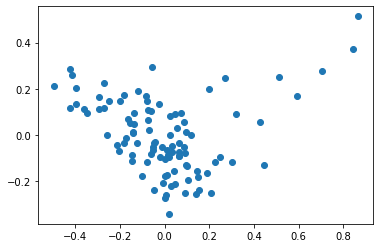

In [8]:
# how it looks

pp.scatter(new_df.PC1, new_df.PC2)

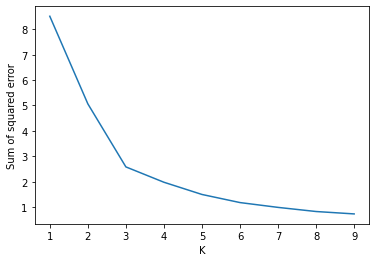

In [9]:
# using the elbow method to find number of clusters

k_rng = range(1, 10)
sse = []

for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(new_df[['PC1', 'PC2']])
    sse.append(km.inertia_)
    
pp.xlabel('K')
pp.ylabel('Sum of squared error')
pp.plot(k_rng, sse)

In [10]:
km1 = KMeans(n_clusters=3)
y_predicted = km1.fit_predict(new_df[['PC1', 'PC2']])

new_df['Cluster'] = y_predicted
new_df

,PC1,PC2,Cluster
0,0.319386,0.092198,0
1,0.142902,-0.153187,1
2,0.063131,-0.074832,1
3,0.029545,-0.218830,1
4,0.271428,0.247164,0
...,...,...,...
95,0.206128,-0.248418,1
96,0.148167,-0.180415,1
97,0.042411,-0.154613,1
98,0.018331,-0.093459,1


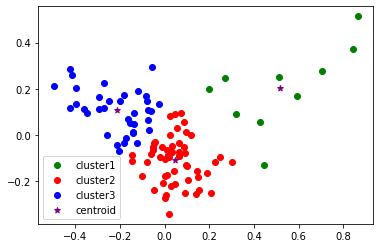

In [11]:
# dividing the daatframe into different clusters

from sklearn.cluster import KMeans

new_dfa = new_df[new_df.Cluster == 0] # new_dfa will contain all the entries that are in cluster 0 and so on
new_dfb = new_df[new_df.Cluster == 1]
new_dfc = new_df[new_df.Cluster == 2]

# visualising the clusters and the centroids

pp.scatter(new_dfa.PC1, new_dfa.PC2, color = 'green', label = 'cluster1')
pp.scatter(new_dfb.PC1, new_dfb.PC2, color = 'red', label = 'cluster2')
pp.scatter(new_dfc.PC1, new_dfc.PC2, color = 'blue', label = 'cluster3')
pp.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')

pp.legend()